In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# 10.3 Apply: General split-apply-combine

In [2]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.387973
183,23.17,6.50,Yes,Sun,Dinner,4,0.389922
232,11.61,3.39,No,Sat,Dinner,2,0.412409
67,3.07,1.00,Yes,Sat,Dinner,1,0.483092
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381


In [3]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.310180
       185       20.69  5.00     No   Sun  Dinner     5  0.318674
       51        10.29  2.60     No   Sun  Dinner     2  0.338101
       149        7.51  2.00     No  Thur   Lunch     2  0.362976
       232       11.61  3.39     No   Sat  Dinner     2  0.412409
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.387973
       183       23.17  6.50    Yes   Sun  Dinner     4  0.389922
       67         3.07  1.00    Yes   Sat  Dinner     1  0.483092
       178        9.60  4.00    Yes   Sun  Dinner     2  0.714286
       172        7.25  5.15    Yes   Sun  Dinner     2  2.452381

In [4]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.166667
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.228833
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.115821
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.138160
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.133465
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.245038
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.083632
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.131199

In [5]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.192237,0.057665,0.060217,0.158622,0.184308,0.227015,0.412409
Yes,93.0,0.218176,0.254295,0.036955,0.119534,0.181818,0.242326,2.452381


In [6]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.192237
       Yes         0.218176
std    No          0.057665
       Yes         0.254295
min    No          0.060217
       Yes         0.036955
25%    No          0.158622
       Yes         0.119534
50%    No          0.184308
       Yes         0.181818
75%    No          0.227015
       Yes         0.242326
max    No          0.412409
       Yes         2.452381
dtype: float64

## Suppressing the Group Keys

In [7]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.310180
185,20.69,5.00,No,Sun,Dinner,5,0.318674
51,10.29,2.60,No,Sun,Dinner,2,0.338101
149,7.51,2.00,No,Thur,Lunch,2,0.362976
232,11.61,3.39,No,Sat,Dinner,2,0.412409
109,14.31,4.00,Yes,Sat,Dinner,2,0.387973
183,23.17,6.50,Yes,Sun,Dinner,4,0.389922
67,3.07,1.00,Yes,Sat,Dinner,1,0.483092
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381


## Quantile and Bucket Analysis

In [8]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
frame.head()

,data1,data2
0,-0.188074,0.246755
1,1.074349,-1.042475
2,1.264057,-0.214245
3,1.125359,-0.995069
4,-0.086809,1.057207


In [9]:
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

0    (-1.339, 0.293]
1     (0.293, 1.925]
2     (0.293, 1.925]
3     (0.293, 1.925]
4    (-1.339, 0.293]
5    (-1.339, 0.293]
6     (0.293, 1.925]
7     (0.293, 1.925]
8     (0.293, 1.925]
9     (0.293, 1.925]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.977, -1.339] < (-1.339, 0.293] < (0.293, 1.925] < (1.925, 3.556]]

In [10]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.977, -1.339]",88.0,3.936343,0.174941,-2.203070
"(-1.339, 0.293]",511.0,3.014681,0.032898,-3.467988
"(0.293, 1.925]",368.0,2.606018,-0.058182,-2.550732
"(1.925, 3.556]",33.0,2.632850,0.146928,-1.543752


In [11]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,3.936343,0.188410,-2.203070
1,100.0,2.587207,-0.023567,-3.467988
2,100.0,2.220617,0.040051,-2.214813
3,100.0,2.520017,0.027973,-2.253290
4,100.0,2.583089,0.035080,-2.690511
5,100.0,3.014681,0.056527,-3.122884
6,100.0,2.196059,0.003697,-2.527297
7,100.0,1.885471,-0.192835,-2.550732
8,100.0,1.753158,-0.031501,-2.258656


## Example: Filling Missing Values with Group-Specific Values

In [12]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    1.748136
2         NaN
3    0.930663
4         NaN
5    0.092269
dtype: float64

In [13]:
s.fillna(s.mean())

0    0.923689
1    1.748136
2    0.923689
3    0.930663
4    0.923689
5    0.092269
dtype: float64

In [14]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio          0.183975
New York      2.421410
Vermont      -0.952721
Florida       0.283377
Oregon        0.639295
Nevada       -2.703998
California   -0.426977
Idaho         1.128427
dtype: float64

In [15]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.183975
New York      2.421410
Vermont            NaN
Florida       0.283377
Oregon        0.639295
Nevada             NaN
California   -0.426977
Idaho              NaN
dtype: float64

In [16]:
data.groupby(group_key).mean()

East    0.962920
West    0.106159
dtype: float64

In [17]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.183975
New York      2.421410
Vermont       0.962920
Florida       0.283377
Oregon        0.639295
Nevada        0.106159
California   -0.426977
Idaho         0.106159
dtype: float64

In [18]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.183975
New York      2.421410
Vermont       0.500000
Florida       0.283377
Oregon        0.639295
Nevada       -1.000000
California   -0.426977
Idaho        -1.000000
dtype: float64

## Example: Random Sampling and Permutation

In [19]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [20]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [21]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

AC      1
5C      5
2S      2
10C    10
4D      4
dtype: int64

In [22]:
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw, n=2)

C  9C     9
   AC     1
D  KD    10
   3D     3
H  9H     9
   5H     5
S  9S     9
   4S     4
dtype: int64

In [23]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

JC     10
7C      7
9D      9
10D    10
6H      6
5H      5
2S      2
KS     10
dtype: int64

## Example: Group Weighted Average and Correlation

In [24]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.624519,0.589166
1,a,0.667403,0.952689
2,a,0.172130,0.104111
3,a,0.522416,0.349338
4,b,0.714131,0.541468
5,b,0.029960,0.526655
6,b,0.648443,0.136147
7,b,0.244833,0.697985


In [25]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.603514
b    0.347814
dtype: float64

In [26]:
close_px = pd.read_csv('examples/stock_px_2.csv',
                       parse_dates=True,
                       index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [27]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [28]:
spx_corr = lambda x: x.corrwith(x['SPX'])
rets = close_px.pct_change().dropna()
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [29]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## Example: Group-Wise Linear Regression

In [30]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [31]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# 10.4 Pivot Tables and Cross-Tabulation

In [32]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.179740   18.420000
     Yes     2.066667  2.714000  0.216293   16.813333
Sat  No      2.555556  3.102889  0.190412   19.661778
     Yes     2.476190  2.875476  0.179833   21.276667
Sun  No      2.929825  3.167895  0.193617   20.506667
     Yes     2.578947  3.516842  0.322021   24.120000
Thur No      2.488889  2.673778  0.193424   17.113111
     Yes     2.352941  3.030000  0.198508   19.190588

In [33]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.162612  0.202545
       Sat   2.555556  2.476190  0.190412  0.179833
       Sun   2.929825  2.578947  0.193617  0.322021
       Thur  2.000000       NaN  0.190114       NaN
Lunch  Fri   3.000000  1.833333  0.231125  0.236915
       Thur  2.500000  2.352941  0.193499  0.198508

In [34]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.162612  0.202545  0.192562
       Sat   2.555556  2.476190  2.517241  0.190412  0.179833  0.185305
       Sun   2.929825  2.578947  2.842105  0.193617  0.322021  0.225718
       Thur  2.000000       NaN  2.000000  0.190114       NaN  0.190114
Lunch  Fri   3.000000  1.833333  2.000000  0.231125  0.236915  0.236088
       Thur  2.500000  2.352941  2.459016  0.193499  0.198508  0.194895
All          2.668874  2.408602  2.569672  0.192237  0.218176  0.202123

In [35]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [36]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.160000  0.000000  0.000000
            Yes     0.000000  0.483092  0.000000  0.000000
       2    No      0.162612  0.198319  0.206535  0.190114
            Yes     0.211180  0.178877  0.400522  0.000000
       3    No      0.000000  0.183870  0.182962  0.000000
            Yes     0.000000  0.176599  0.183278  0.000000
       4    No      0.000000  0.177734  0.175289  0.000000
            Yes     0.133465  0.147074  0.254373  0.000000
       5    No      0.000000  0.000000  0.263344  0.000000
            Yes     0.000000  0.119284  0.070274  0.000000
       6    No      0.000000  0.000000  0.115821  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.222087
            Yes     0.288288  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.201503
            Yes     0.226641  0.000000  0.000000  0.191197
       3    No      0.231125  0.000000  0.000000  0.092162
            Yes     0.000000  0.000000  0.000000  0.257941
       4    No      0.000000  0.000000  0.000000  0.161573
            Yes     0.000000  0.000000  0.000000  0.186592
       5    No      0.000000  0.000000  0.000000  0.138160
       6    No      0.000000  0.000000  0.000000  0.211191

## Cross-Tabulations: Crosstab

In [37]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_csv(StringIO(data), sep='\s+')
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [38]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [39]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# Chapter 10 problem set 1
## John
1. Load the [diamonds](https://github.com/UCD-pbio-rclub/python-data-analysis_JohnD/raw/master/datasets/diamonds.csv) dataset.

In [40]:
dat = pd.read_csv('https://github.com/UCD-pbio-rclub/python-data-analysis_JohnD/raw/master/datasets/diamonds.csv')
dat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. Find the max price of each cut and color combination

In [41]:
grouped = dat.groupby(['cut','color'])
grouped_price = grouped['price']
grouped_price.agg('max')

cut        color
Fair       D        16386
           E        15584
           F        17995
           G        18574
           H        18565
           I        17408
           J        15824
Good       D        18468
           E        18236
           F        18686
           G        18788
           H        18640
           I        18707
           J        18325
Ideal      D        18693
           E        18729
           F        18780
           G        18806
           H        18760
           I        18779
           J        18508
Premium    D        18575
           E        18477
           F        18791
           G        18741
           H        18795
           I        18823
           J        18706
Very Good  D        18542
           E        18731
           F        18777
           G        18818
           H        18803
           I        18500
           J        18430
Name: price, dtype: int64

3. Find the min, max, and average dimensions (x,y,z) of a diamond for each carat size

In [42]:
grouped = dat.groupby(['carat'])
functions = ['count', 'mean', 'max']
grouped_dims = grouped['x','y','z']
grouped_dims.agg(functions)

x                     y                     z                
      count      mean   max count      mean   max count      mean   max
carat                                                                  
0.20     12  3.786667  3.86    12  3.753333  3.84    12  2.303333  2.36
0.21      9  3.874444  3.96     9  3.837778  3.93     9  2.332222  2.40
0.22      5  3.898000  3.93     5  3.848000  3.89     5  2.386000  2.49
0.23    293  3.946382  4.14   293  3.973379  4.19   293  2.431468  2.50
0.24    254  3.990157  4.12   254  4.019331  4.15   254  2.465591  2.54
0.25    212  4.062500  5.33   212  4.086934  5.28   212  2.506934  3.12
0.26    253  4.102688  4.24   253  4.124704  4.28   253  2.536364  2.62
0.27    233  4.159142  4.30   233  4.181588  4.36   233  2.567897  2.66
0.28    198  4.207172  4.38   198  4.233687  4.41   198  2.595707  2.69
0.29    130  4.262846  4.48   130  4.290538  4.42   130  2.624000  2.72
0.30   2604  4.299443  4.67  2604  4.308061  4.62  2604  2.664351  2.78
0.31   2249  4.353219  4.61  2249  4.360912  4.60  2249  2.690422  2.78
0.32   1840  4.399821  4.60  1840  4.406995  4.65  1840  2.717755  2.80
0.33   1189  4.449521  4.85  1189  4.456569  4.79  1189  2.741447  2.95
0.34    910  4.495363  6.65   910  4.499560  4.77   910  2.768714  2.89
0.35    667  4.544693  5.67   667  4.550825  5.64   667  2.801049  3.66
0.36    572  4.580927  4.79   572  4.590105  4.79   572  2.819266  2.90
0.37    394  4.625228  4.96   394  4.632944  4.91   394  2.839949  2.94
0.38    670  4.662403  4.85   670  4.677313  4.88   670  2.866955  2.95
0.39    398  4.696156  4.91   398  4.713593  6.02   398  2.898116  4.44
0.40   1299  4.727991  4.94  1299  4.738199  4.97  1299  2.928922  3.03
0.41   1382  4.769247  4.98  1382  4.775427  4.97  1382  2.949906  3.04
0.42    706  4.814717  5.11   706  4.821303  5.11   706  2.970354  3.05
0.43    488  4.851844  5.00   488  4.859816  5.03   488  2.991168  3.07
0.44    212  4.892594  5.12   212  4.900189  5.07   212  3.012123  3.08
0.45    110  4.920545  5.10   110  4.908273  5.14   110  3.040545  3.21
0.46    178  4.952135  5.16   178  4.965281  5.24   178  3.064775  3.21
0.47     99  5.001212  5.19    99  5.010101  5.21    99  3.076869  3.24
0.48     63  5.045714  5.29    63  5.061429  5.26    63  3.090794  3.20
0.49     45  5.108444  5.26    45  5.097556  5.25    45  3.094444  3.20
...     ...       ...   ...   ...       ...   ...   ...       ...   ...
2.45      4  8.700000  8.72     4  8.672500  8.81     4  5.352500  5.49
2.46      3  8.693333  8.82     3  8.616667  8.76     3  5.353333  5.44
2.47      3  8.713333  8.85     3  8.653333  8.79     3  5.323333  5.39
2.48      9  8.674444  8.88     9  8.604444  8.76     9  5.340000  5.45
2.49      3  8.526667  8.76     3  8.456667  8.70     3  5.413333  5.45
2.50     17  8.567647  8.80    17  8.517059  8.89    17  5.418235  5.58
2.51     17  8.714118  8.88    17  8.684706  8.87    17  5.351765  5.48
2.52      9  8.641111  8.90     9  8.581111  8.87     9  5.425556  5.60
2.53      8  8.747500  8.90     8  8.663750  8.82     8  5.392500  5.46
2.54      9  8.713333  8.83     9  8.674444  8.78     9  5.448889  5.50
2.55      3  8.686667  8.70     3  8.603333  8.65     3  5.430000  5.49
2.56      3  8.703333  8.76     3  8.686667  8.76     3  5.403333  5.47
2.57      3  8.860000  8.99     3  8.773333  8.94     3  5.383333  5.49
2.58      3  8.810000  9.08     3  8.750000  9.01     3  5.460000  5.57
2.59      1  8.830000  8.83     1  8.770000  8.77     1  5.430000  5.43
2.60      3  8.820000  9.05     3  8.750000  8.94     3  5.423333  5.54
2.61      3  8.706667  8.85     3  8.623333  8.73     3  5.513333  5.55
2.63      3  8.800000  8.83     3  8.816667  8.88     3  5.480000  5.50
2.64      1  8.880000  8.88     1  8.830000  8.83     1  5.520000  5.52
2.65      1  8.820000  8.82     1  8.750000  8.75     1  5.450000  5.45
2.66      3  8.710000  8.71     3  8.650000  8.65     3  5.553333  5.58
2.67      1  8.690000  8.69     1  8.640000  8.64 

## Min-Yao

Using the same data from chapter 8. (Import my RNA-Seq CPM data from 'Expression Browser_CPM_practice.xlsx' file. [Expression Browser_CPM_practice.xlsx](https://github.com/UCD-pbio-rclub/python-data-analysis_MinYaoJ/blob/master/Expression%20Browser_CPM_practice.xlsx)).

#### 1. Grouping by genotypes and treatments and focusing on COMT (Solyc03g080180.3), please find which genotype and treatment combination has the highest average expression level, and which combination has the lowest average expression level.

In [43]:
dat = pd.read_excel('https://github.com/UCD-pbio-rclub/python-data-analysis_MinYaoJ/raw/master/Expression%20Browser_CPM_practice.xlsx')
dat.set_index('Name', inplace=True)
dat.index.names = ['SolycID']
params_df = pd.DataFrame(dat.columns.tolist())
params_df = params_df[0].apply(lambda x: pd.Series(list(x.strip().replace('_',''))))
mindexes = pd.MultiIndex.from_frame(params_df)
dat.columns = mindexes
dat.columns.names = ['genotype', 'treatment', 'sample_number']
dat = dat.unstack().reset_index().set_index('SolycID')
dat.columns = ['genotype', 'treatment', 'sample_number','expression']
dat.head()

,genotype,treatment,sample_number,expression
SolycID,,,,
Solyc00g005000.3,6,c,1,0.000000
Solyc00g005005.1,6,c,1,0.000000
Solyc00g005040.3,6,c,1,0.000000
Solyc00g005050.3,6,c,1,49.947944
Solyc00g005055.1,6,c,1,0.000000


In [44]:
COMT = dat.index == 'Solyc03g080180.3'
dat2 = dat[COMT]
grouped = dat2.groupby(['genotype','treatment'])
grouped.agg('mean').sort_values(by='expression')[-1:]

,,expression
genotype,treatment,
5,c,494.704924


In [45]:
grouped.agg('mean').sort_values(by='expression')[:1]

,,expression
genotype,treatment,
6,c,159.040833


#### 2. Grouping by chromosome number, please find which gene has the highest average expression level, and which gene has the largest expression level changes.

In [46]:
chroms = list(dat.index)
for i in range(len(chroms)):
    chroms[i] = chroms[i][5:7]
dat['chromosome'] = chroms
dat.head()

,genotype,treatment,sample_number,expression,chromosome
SolycID,,,,,
Solyc00g005000.3,6,c,1,0.000000,00
Solyc00g005005.1,6,c,1,0.000000,00
Solyc00g005040.3,6,c,1,0.000000,00
Solyc00g005050.3,6,c,1,49.947944,00
Solyc00g005055.1,6,c,1,0.000000,00


In [47]:
dat2 = dat.groupby([dat.index.get_level_values(0),'chromosome'])[['expression']].mean()
dat2.reset_index(level = 1, inplace = True)
dat2.groupby(['chromosome'], sort=False)['expression'].max()
idx = dat2.groupby(['chromosome'])['expression'].transform(max) == dat2['expression']
dat2[idx]

,chromosome,expression
SolycID,,
Solyc00g007270.3,00,459.079773
Solyc01g107870.3,01,2772.209403
Solyc02g092790.3,02,2441.304607
Solyc03g096360.3,03,2365.620482
Solyc04g071610.3,04,4401.074679
Solyc05g014470.3,05,5048.918244
Solyc06g076140.3,06,8471.018200
Solyc07g064160.3,07,8764.899266
Solyc08g006890.3,08,4970.851298


In [48]:
dat2 = dat.groupby([dat.index.get_level_values(0),'chromosome'])[['expression']].var()
dat2.reset_index(level = 1, inplace = True)
dat2.groupby(['chromosome'], sort=False)['expression'].max()
idx = dat2.groupby(['chromosome'])['expression'].transform(max) == dat2['expression']
dat2[idx]

,chromosome,expression
SolycID,,
Solyc00g047700.3,00,1.378682e+04
Solyc01g095530.2,01,1.010881e+06
Solyc02g092790.3,02,7.997999e+05
Solyc03g096360.3,03,7.999905e+05
Solyc04g071070.2,04,1.574172e+07
Solyc05g014470.3,05,2.942778e+06
Solyc06g076140.3,06,5.067459e+06
Solyc07g064160.3,07,1.550154e+07
Solyc08g067030.3,08,1.042071e+06


## Kae 

Using the data [from before](https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_KaeL/master/titanic.csv), group the passengers by embark code and total the survivors in each group.

In [49]:
dat = pd.read_csv('https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_KaeL/master/titanic.csv')
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
dat.groupby('Embarked')['Survived'].sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

## Joel


Using the weather data from last week (https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/weather.csv):

In [51]:
dat = pd.read_csv('https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/weather.csv')
dat.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


1. Use grouping functions to visualize the average temperature and humidity by airport over the year

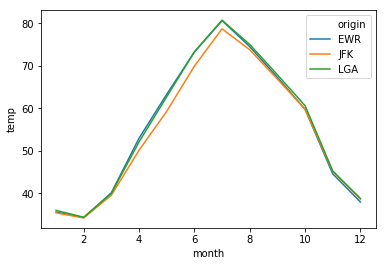

In [52]:
dat2 = dat.groupby(['origin','month'])[['humid','temp']].mean().reset_index()
sns.lineplot(data=dat2, x="month",y="temp",hue="origin")

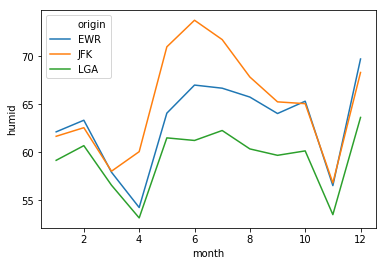

In [53]:
sns.lineplot(data=dat2, x="month",y="humid",hue="origin")

2. How can you visualize the average daily ranges of humidity over the year (monthly)?

In [54]:
dat2 = dat.groupby(['origin','month','day'])[['humid','temp']].mean().reset_index()
dat2.head()

,origin,month,day,humid,temp
0,EWR,1,1,56.748182,36.819091
1,EWR,1,2,48.816250,28.700000
2,EWR,1,3,55.029167,29.577500
3,EWR,1,4,55.715000,34.332500
4,EWR,1,5,51.168333,36.560000


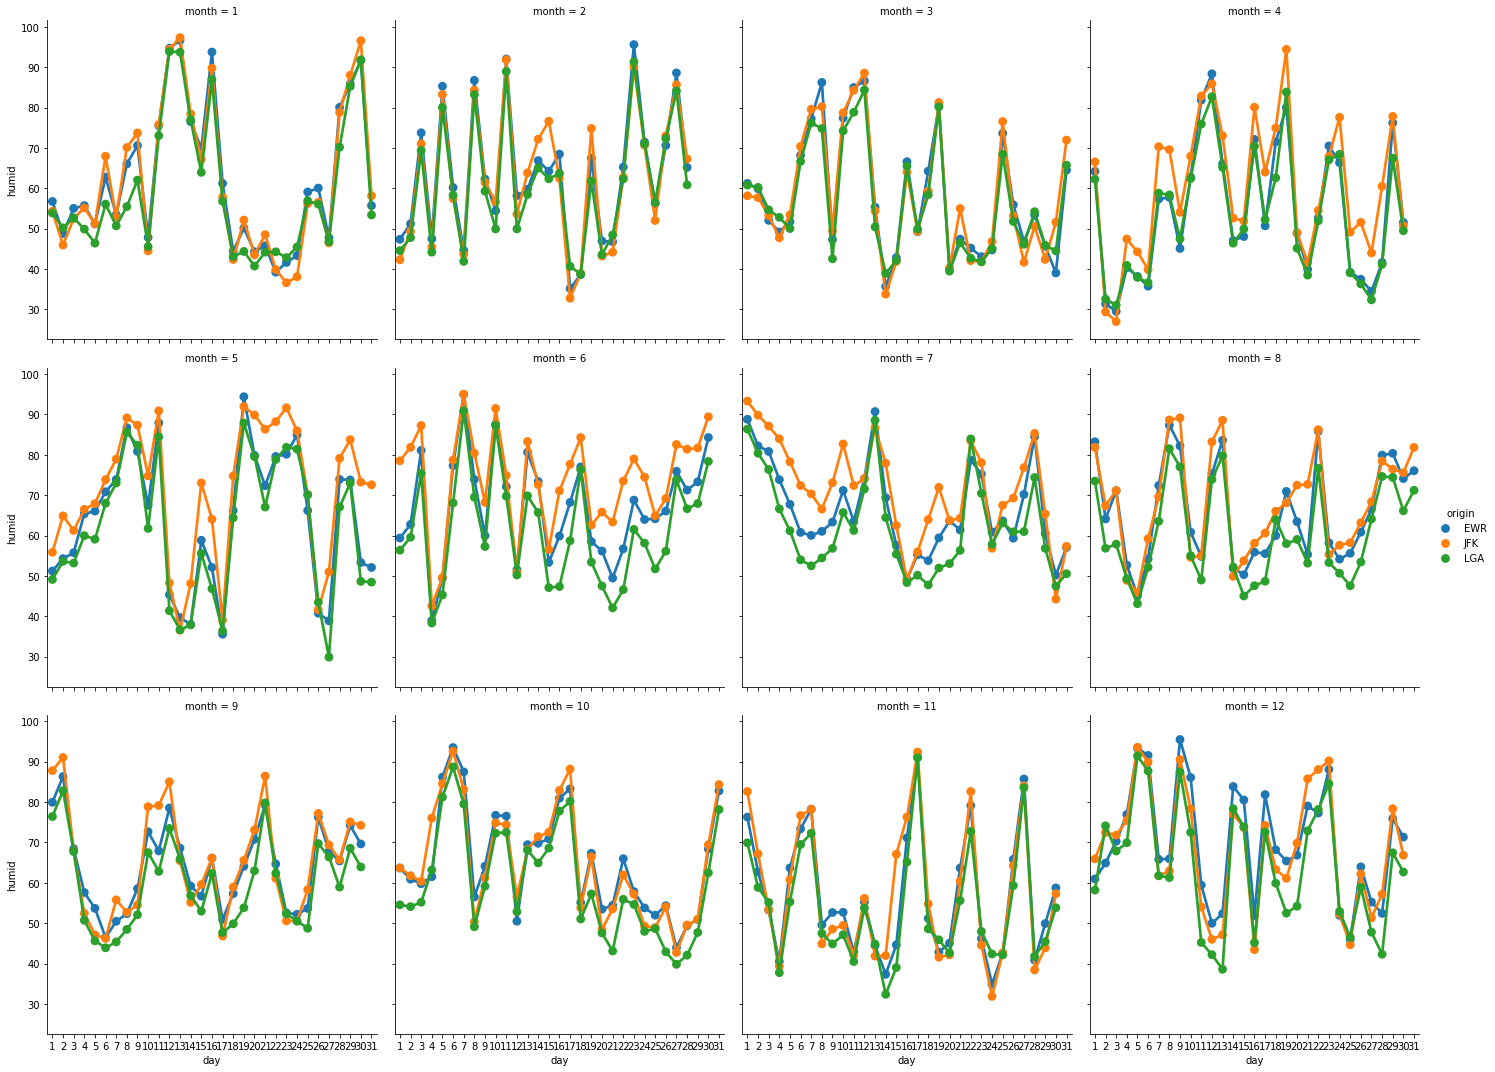

In [55]:
sns.catplot(data=dat2, x="day",y="humid",hue="origin",
            col="month", col_wrap = 4, kind = "point",
           figsize= (10,10))

## Next week problem

In [56]:
dat = pd.read_json('https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/usda_food/database.json')
dat.head()

,description,group,id,manufacturer,nutrients,portions,tags
0,"Cheese, caraway",Dairy and Egg Products,1008,,"[{'value': 25.18, 'units': 'g', 'description':...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]
1,"Cheese, cheddar",Dairy and Egg Products,1009,,"[{'value': 24.9, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'cup, diced', 'grams': ...",[]
2,"Cheese, edam",Dairy and Egg Products,1018,,"[{'value': 4.22, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...",[]
3,"Cheese, feta",Dairy and Egg Products,1019,,"[{'value': 5.2, 'units': 'g', 'description': '...","[{'amount': 1, 'unit': 'cup, crumbled', 'grams...",[]
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,,"[{'value': 3.27, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]


In [57]:
dat2 = dat[dat['manufacturer'] != ''].dropna()

In [58]:
pd.crosstab(dat2.manufacturer, dat2.group, margins=True)

group,Baby Foods,Baked Products,Beverages,Breakfast Cereals,Fast Foods,Fats and Oils,Legumes and Legume Products,"Meals, Entrees, and Sidedishes",Restaurant Foods,Sausages and Luncheon Meats,Snacks,"Soups, Sauces, and Gravies",Sweets,Vegetables and Vegetable Products,All
manufacturer,,,,,,,,,,,,,,,
ADM KAO LLC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
Albertson's Inc.,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
"Anheuser-Busch, Inc.",0,0,4,0,0,0,0,0,0,0,0,0,0,0,4
Applebee's,0,0,0,0,0,0,0,0,6,0,0,0,0,0,6
Archway Cookies,0,36,0,0,0,0,0,0,0,0,0,0,0,0,36
Arizona Beverage Co.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
"B&G Foods, distributor",0,0,0,4,0,0,0,0,0,0,0,0,0,0,4
Burger King Corporation,0,0,0,0,16,0,0,0,0,0,0,0,0,0,16
Campbell Soup Co.,0,0,20,0,0,0,5,22,0,0,0,142,0,14,203


In [59]:
dat3 = pd.crosstab(dat2.manufacturer, dat2.group)
dat3

group,Baby Foods,Baked Products,Beverages,Breakfast Cereals,Fast Foods,Fats and Oils,Legumes and Legume Products,"Meals, Entrees, and Sidedishes",Restaurant Foods,Sausages and Luncheon Meats,Snacks,"Soups, Sauces, and Gravies",Sweets,Vegetables and Vegetable Products
manufacturer,,,,,,,,,,,,,,
ADM KAO LLC,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Albertson's Inc.,0,0,0,0,0,0,0,0,0,0,1,0,0,0
"Anheuser-Busch, Inc.",0,0,4,0,0,0,0,0,0,0,0,0,0,0
Applebee's,0,0,0,0,0,0,0,0,6,0,0,0,0,0
Archway Cookies,0,36,0,0,0,0,0,0,0,0,0,0,0,0
Arizona Beverage Co.,0,0,1,0,0,0,0,0,0,0,0,0,0,0
"B&G Foods, distributor",0,0,0,4,0,0,0,0,0,0,0,0,0,0
Burger King Corporation,0,0,0,0,16,0,0,0,0,0,0,0,0,0
Campbell Soup Co.,0,0,20,0,0,0,5,22,0,0,0,142,0,14


In [60]:
dat3.loc[dat3.idxmax()].drop_duplicates()

group,Baby Foods,Baked Products,Beverages,Breakfast Cereals,Fast Foods,Fats and Oils,Legumes and Legume Products,"Meals, Entrees, and Sidedishes",Restaurant Foods,Sausages and Luncheon Meats,Snacks,"Soups, Sauces, and Gravies",Sweets,Vegetables and Vegetable Products
manufacturer,,,,,,,,,,,,,,
Mead Johnson,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Archway Cookies,0,36,0,0,0,0,0,0,0,0,0,0,0,0
Campbell Soup Co.,0,0,20,0,0,0,5,22,0,0,0,142,0,14
"The Quaker Oats, Co.",0,0,0,98,0,0,0,0,0,0,0,0,0,0
McDonald's Corporation,0,0,0,0,84,0,0,0,0,0,0,0,0,0
ADM KAO LLC,0,0,0,0,0,1,0,0,0,0,0,0,0,0
"Kellogg, Co.",0,29,1,84,0,0,75,0,0,0,0,0,0,0
Applebee's,0,0,0,0,0,0,0,0,6,0,0,0,0,0
Hormel Foods Corp.,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [61]:
pd.merge(pd.Series(dat3.idxmax(), name='Manufacturer'), 
         pd.Series(dat3.max(), name='Count'),
         left_index=True, right_index=True)

,Manufacturer,Count
group,,
Baby Foods,Mead Johnson,1
Baked Products,Archway Cookies,36
Beverages,Campbell Soup Co.,20
Breakfast Cereals,"The Quaker Oats, Co.",98
Fast Foods,McDonald's Corporation,84
Fats and Oils,ADM KAO LLC,1
Legumes and Legume Products,"Kellogg, Co.",75
"Meals, Entrees, and Sidedishes",Campbell Soup Co.,22
Restaurant Foods,Applebee's,6
